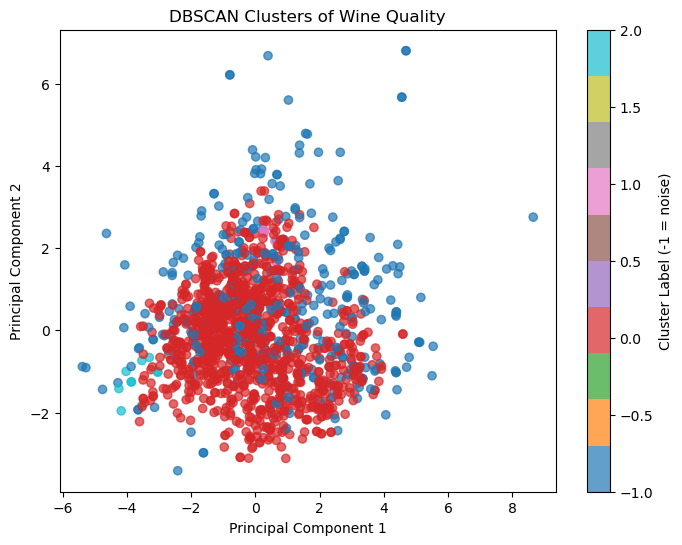

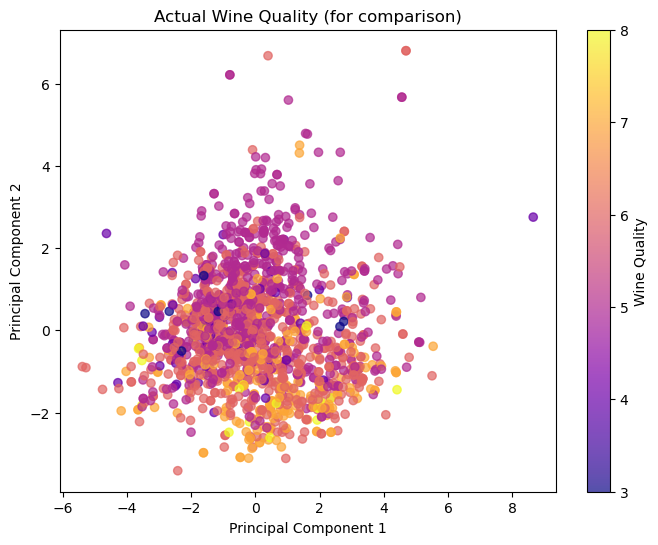

In [1]:
# DBSCAN Clustering on Wine Quality Dataset (with PCA for visualization)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = data['quality'].values  # Keep for comparison in visualization

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Dimensionality Reduction for Visualization
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------
# Apply DBSCAN
# -----------------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# -----------------------------
# Visualization of DBSCAN Clusters in PCA Space
# -----------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=clusters, cmap='tab10', alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clusters of Wine Quality")
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Label (-1 = noise)")
plt.show()

# -----------------------------
# Optional: Compare clusters to actual quality
# -----------------------------
plt.figure(figsize=(8,6))
scatter2 = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y, cmap='plasma', alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Actual Wine Quality (for comparison)")
cbar2 = plt.colorbar(scatter2)
cbar2.set_label("Wine Quality")
plt.show()

## Summary & Discussion

#We applied **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** to group wines based on physicochemical features. DBSCAN identifies clusters as dense regions separated by sparser areas and labels points in low-density regions as noise.

#**Key Points:**
#- PCA was used to reduce dimensionality to 2 components for visualization.
#- DBSCAN automatically identified clusters and noise without specifying the number of clusters.
#- Some points were labeled as noise (-1), indicating they do not belong to any dense cluster.

#**Limitations:**
#- DBSCAN is sensitive to `eps` and `min_samples` parameters.
#- High-dimensional data may reduce clustering quality without dimensionality reduction.
#- Distance-based density assumption may not capture complex patterns.

#**Potential Improvements:**
#- Tune `eps` and `min_samples` using a k-distance plot.
#- Combine DBSCAN with PCA or t-SNE for better visualization in high dimensions.
#- Compare with K-Means or hierarchical clustering to evaluate different structures.

#**Conclusion:**
#DBSCAN provides a powerful, non-parametric approach to clustering that identifies dense regions and handles noise, complementing K-Means for exploratory data analysis on unlabeled datasets.
